In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
#sns.set_palette("YlGnBu")

In [2]:
y=pd.read_csv('/hpf/largeprojects/tabori/users/yuan/mbp1413/data/train_test_val/test_cv/raw_data/pbmc68k_y_test_cv.csv')
y.columns=['cell_id','true']
y['umap1']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/umapdata.npy')[:,0]
y['umap2']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/umapdata.npy')[:,1]
y['pca1']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/pcadata.npy')[:,0]
y['pca2']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/pcadata.npy')[:,1]
y['umap1']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/umapdata.npy')[:,0]
y['umap2']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/umapdata.npy')[:,1]
y['pcaumap1']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/pcaumapdata.npy')[:,0]
y['pcaumap2']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/pcaumapdata.npy')[:,1]
y['TSNE1']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/pcatsnedata.npy')[:,0]
y['TSNE2']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/pcatsnedata.npy')[:,1]

In [3]:
y['Logistic Regression']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/lgr_ypred.npy')
y['SVM']=pd.read_csv('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/svm/models/final_pred.csv')['pred']
y['Mulit Layer Perceptron']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/mlp_ypred.npy')
y['Random Forest']=pd.read_csv('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/rf/models/rf_final_pred.csv')['pred']
y['Auto Encoder + Logistic Regression']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/encoder_ypred.npy')
y['Adaboost']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/adb_ypred.npy')
y['KNN']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/knn_ypred.npy')
y['SingleR']=pd.read_csv('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/singler/singler_final_pred.csv')['pred']
y.shape

y.to_csv('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/all_y_pred.csv')

In [4]:
#see if predictions are correct
y_plot=y.copy()
for i in range(10,18):
    y_plot.iloc[:,i]=(y_plot.iloc[:,i]==y.iloc[:,1])
y_plot = y_plot.replace({True:'Correct Prediction',False:'Wrong Prediction'})

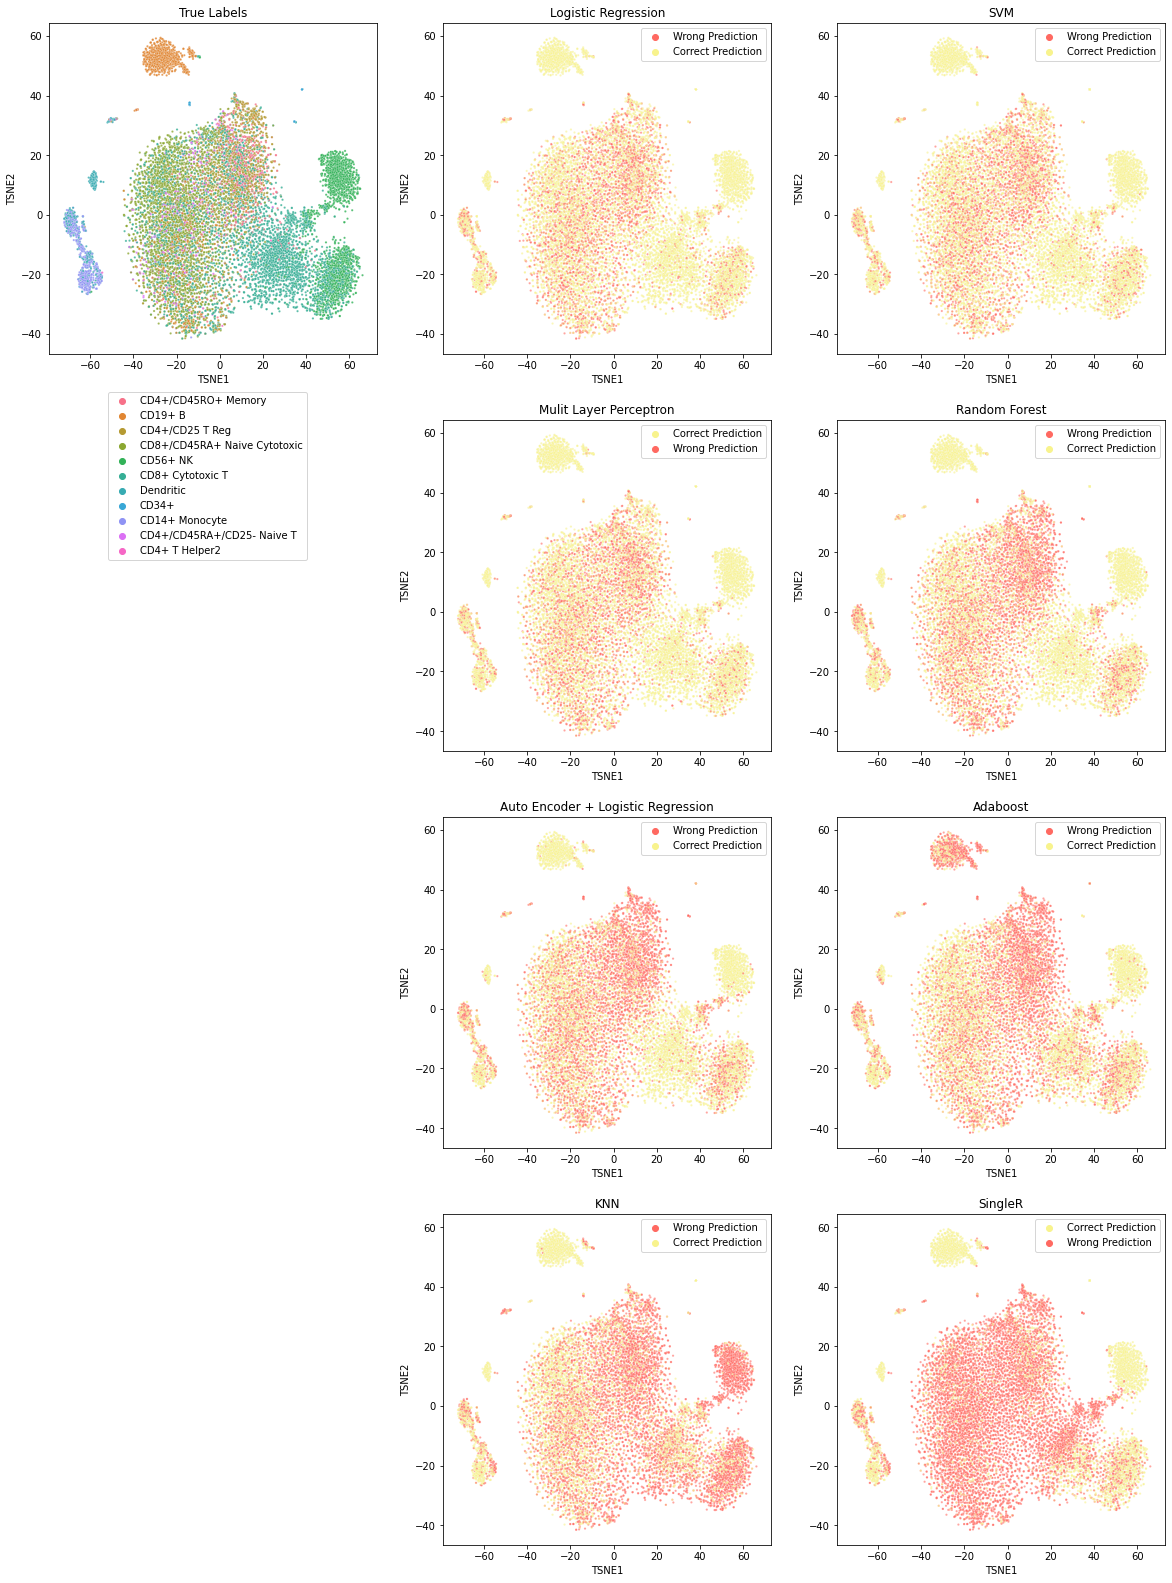

In [5]:
#TSNE plot
fig, axs = plt.subplots(nrows=4, ncols=3,figsize=(20,28))
k=10
for i in range(1,13):
    ax=plt.subplot(4,3,i)
    if i==1 :
        sns.scatterplot(data=y,x='TSNE1',y='TSNE2',hue=y_plot.iloc[:,1],ax=ax,alpha=0.8,s=5)
        ax.set_title('True Labels')
        ax.legend(bbox_to_anchor=(0.8, -0.1))
    elif (i in (4,7,10,13)):        
        ax.axis('off')
    else:
        sns.scatterplot(data=y_plot,x='TSNE1',y='TSNE2',hue=y_plot.iloc[:,k],ax=ax,alpha=0.6,s=5,palette={'Wrong Prediction':'#ff6961','Correct Prediction':'#f8f38d'})
        ax.legend(loc=1)
        ax.set_title(y_plot.columns[k])
        k += 1

fig.savefig('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/tsne.png',dpi=400,bbox_inches = "tight")
    


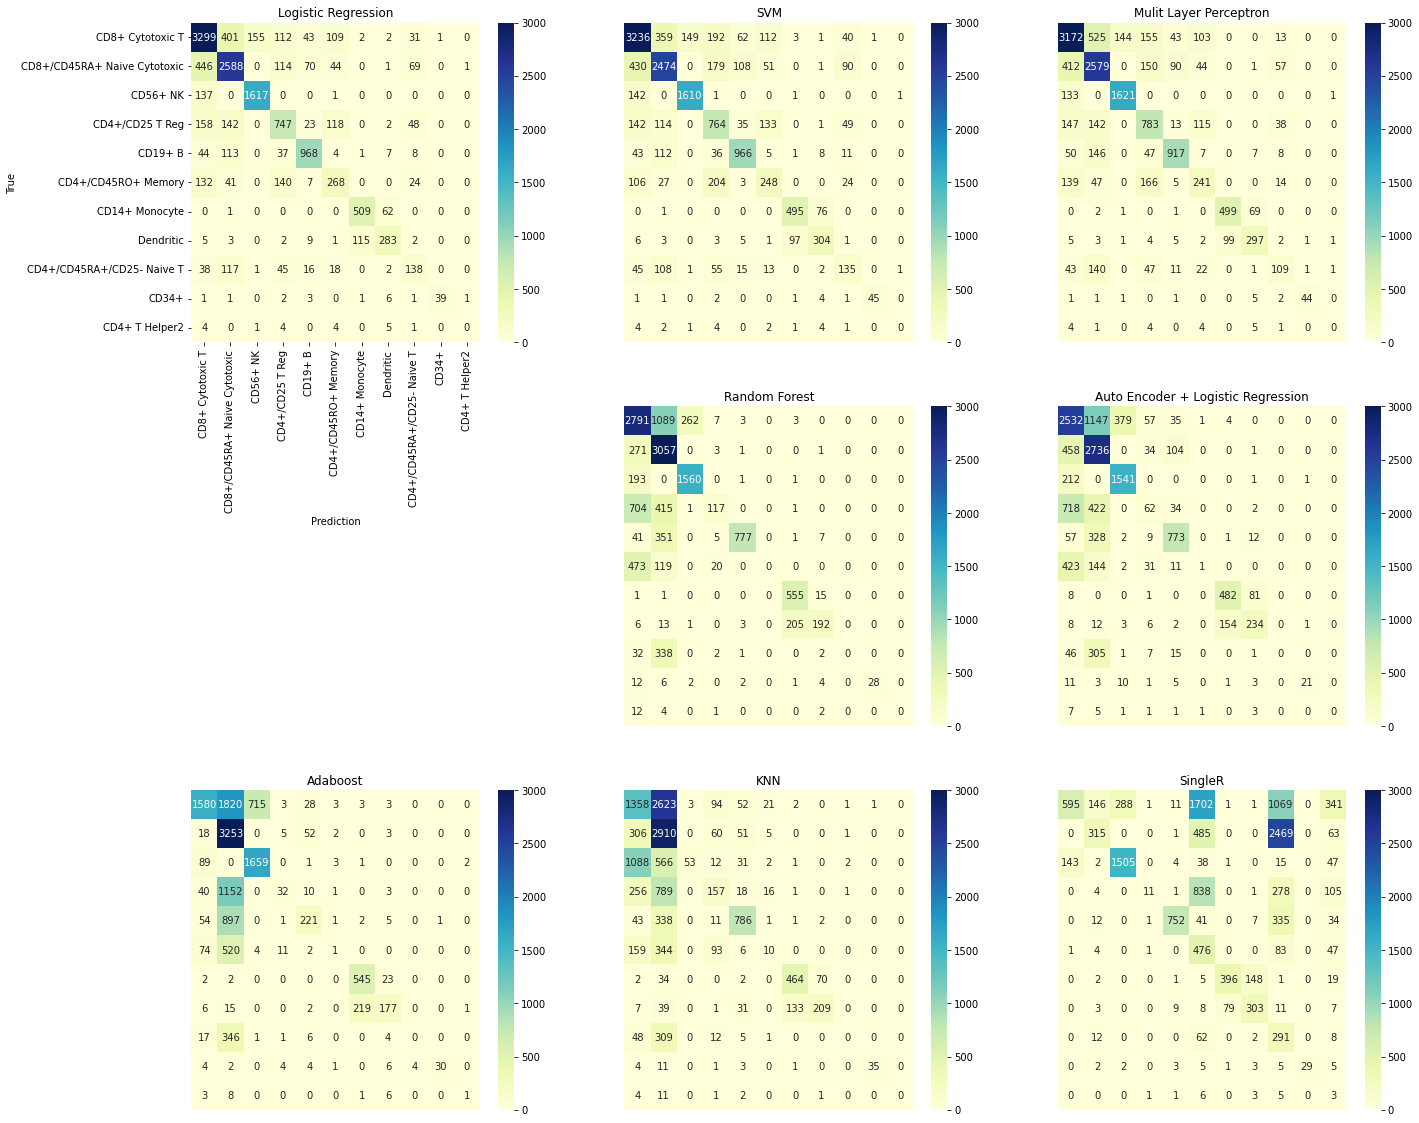

In [6]:
#confusion matrix plot
labels=y_plot['true'].value_counts().index.values

fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(22,20))
k=10
for i in range(1,10):
    ax=plt.subplot(3,3,i)
    if i==4:
        ax.axis('off')
        continue
    matrix =  pd.DataFrame(confusion_matrix(y.iloc[:,1],y.iloc[:,k],labels=labels),index=labels,columns=labels)
    ax=sns.heatmap(matrix,annot=True,fmt="d",ax=ax,cmap="YlGnBu",vmin=0, vmax=3000)
    ax.set_title(y_plot.columns[k])
    ax.set_xlabel('Prediction')
    ax.set_ylabel('True')
    k += 1
    if i!=1:        
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)


fig.savefig('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/confusion_matrix.png',dpi=400,bbox_inches = "tight")


In [7]:
y

,cell_id,true,umap1,umap2,pca1,pca2,pcaumap1,pcaumap2,TSNE1,TSNE2,Logistic Regression,SVM,Mulit Layer Perceptron,Random Forest,Auto Encoder + Logistic Regression,Adaboost,KNN,SingleR
0,31109,CD4+/CD45RO+ Memory,1.390935,-0.055912,-4.036003,0.462114,6.727911,5.846060,4.898643,14.702898,CD4+/CD25 T Reg,CD4+/CD25 T Reg,CD4+/CD45RO+ Memory,CD8+/CD45RA+ Naive Cytotoxic,CD8+ Cytotoxic T,CD8+/CD45RA+ Naive Cytotoxic,CD8+ Cytotoxic T,CD4+/CD45RO+ Memory
1,15638,CD19+ B,2.218461,6.404990,-0.601015,6.624316,10.332494,-7.379355,-29.504913,56.442997,CD19+ B,CD19+ B,CD19+ B,CD19+ B,CD19+ B,CD19+ B,CD19+ B,CD19+ B
2,25224,CD19+ B,2.060061,5.993251,-2.517367,5.957569,10.636944,-6.919894,-22.274176,52.828876,CD19+ B,CD19+ B,CD19+ B,CD19+ B,CD19+ B,CD19+ B,CD19+ B,CD19+ B
3,53256,CD4+/CD25 T Reg,1.165030,0.580430,-5.550675,-1.240366,6.986732,7.638783,-16.703142,2.539497,CD8+ Cytotoxic T,CD8+ Cytotoxic T,CD8+ Cytotoxic T,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD4+/CD45RA+/CD25- Naive T
4,11333,CD4+/CD25 T Reg,1.309566,0.210771,-3.012486,0.870848,7.188529,5.568167,10.334054,6.996360,CD4+/CD25 T Reg,CD4+/CD25 T Reg,CD4+/CD25 T Reg,CD8+ Cytotoxic T,CD4+/CD25 T Reg,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD4+/CD45RO+ Memory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13711,35365,CD8+/CD45RA+ Naive Cytotoxic,1.600302,0.546430,-4.925224,-1.562465,5.789886,8.734136,-31.932306,16.465836,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD4+/CD45RA+/CD25- Naive T
13712,2964,CD8+/CD45RA+ Naive Cytotoxic,1.539539,0.352702,-4.989806,-1.762045,5.973189,7.673934,-14.991207,15.227909,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD4+/CD45RA+/CD25- Naive T
13713,23079,CD8+/CD45RA+ Naive Cytotoxic,1.273327,0.307774,-4.140504,1.204762,6.161148,7.142558,-9.975151,19.872204,CD8+/CD45RA+ Naive Cytotoxic,CD8+ Cytotoxic T,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD8+ Cytotoxic T,CD4+/CD45RA+/CD25- Naive T
13714,51555,CD19+ B,1.613500,0.465767,-7.311596,0.293388,7.807527,8.378293,-12.171259,-13.620895,CD8+/CD45RA+ Naive Cytotoxic,CD19+ B,CD8+ Cytotoxic T,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,CD8+ Cytotoxic T,CD8+ Cytotoxic T,CD4+/CD45RA+/CD25- Naive T
